# **ANÁLISE EXPLORATÓRIA - Produções científicas dos pesquisadores do IFMA**

![](https://escolaeducacao.com.br/wp-content/uploads/2018/08/intituto-federal-maranhao-ifma-cursos.png)

# IMPORTAÇÃO DAS BIBLIOTECAS
Serão utilizadas as bibliotecas: 
- Pandas para visualização e manipulação dos dados. 
- Matplotlib para a criação de gráficos
- OS para construir caminhos de arquivos e manipular nomes de arquivos.
- Glob para obter uma lista de todos os arquivos CSV em um diretório específico.
- Numpy será utilizada em conjunto com pandas para operações numéricas e manipulação de arrays.


In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

# Visualização dos dados
Quais são as 5 primeiras e 5 ultimas linhas da tabela?

In [4]:
tabela = pd.read_excel('dataset1.xlsx')
tabela.head()

,#,Matrícula,Nome,E-mail para Contato,Cargo,Funções,Situação,Campus de Lotação,Setor de Lotação,Campus Exercício,Setor Exercício,Campus SUAP,Setor SUAP,Disciplina de Ingresso,Excluído
0,1,2037010,Abel Batista de Oliveira,abel.oliveira@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,NaN,ATIVO PERMANENTE - 01,Açailândia,DDE-ACA,ACA,DE-ACA,ACA,DE-ACA,Ciências Agronômicas,Não
1,2,1829709,Abias Rodrigues da Cruz,abias.cruz@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,CD4 - DEPEX-COD:COORDENADOR(A) DE CURSOS \n,ATIVO PERMANENTE - 01,Codó,DDE-COD,COD,DEPEX-COD,COD,DEPEX-COD,Matemática/Matemática Estatística,Não
2,3,1825579,Abigail Ferreira Milen,abigail.milen@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,NaN,ATIVO PERMANENTE - 01,Bacabal,CAMP-BAC,BAC,DEN-BAC,BAC,DEN-BAC,Geografia,Não
3,4,1845623,Abilio Soares Coelho,abilio.coelho@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,FUC1 - CCSTSI-TMN:COORDENADOR(A) DE CURSOS \n,ATIVO PERMANENTE - 01,Timon,CAMP-TMN,TMN,DE-TMN,TMN,CCSTSI-TMN,INFORMÁTICA/SUPORTE DE REDES,Não
4,5,1487179,Abmalena Santos Sanches,abmalenass@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,NaN,ATIVO PERMANENTE - 01,Alcântara,CAMP-ALC,ALC,DE-ALC,ALC,DE-ALC,Sociologia,Não


# Informações da Tabela
Nome e tipo de dados de cada coluna, a quantidade de valores não nulos e o uso de memória.

In [3]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       3781 non-null   int64 
 1   Matrícula               3781 non-null   int64 
 2   Nome                    3781 non-null   object
 3   E-mail para Contato     3717 non-null   object
 4   Cargo                   3781 non-null   object
 5   Funções                 775 non-null    object
 6   Situação                3781 non-null   object
 7   Campus de Lotação       3351 non-null   object
 8   Setor de Lotação        3781 non-null   object
 9   Campus Exercício        3781 non-null   object
 10  Setor Exercício         3781 non-null   object
 11  Campus SUAP             3578 non-null   object
 12  Setor SUAP              3781 non-null   object
 13  Disciplina de Ingresso  2393 non-null   object
 14  Excluído                3781 non-null   object
dtypes: i

None

- A tabela possui 15 colunas e 3.781 linhas, as colunas de 'E-mail para Contato', 'Funções', 'Campus de Lotação', 'Campus SUAP' e  'Disciplina de Ingresso' possuem linhas sem informações

# Limpeza inicial
Remoção dos servidores que constam com o status de "APOSENTADO" na coluna "Situação"

In [5]:
tabela = tabela.drop(tabela[tabela['Situação'] == 'APOSENTADO - 02'].index)
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3437 entries, 0 to 3779
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       3437 non-null   int64 
 1   Matrícula               3437 non-null   int64 
 2   Nome                    3437 non-null   object
 3   E-mail para Contato     3427 non-null   object
 4   Cargo                   3437 non-null   object
 5   Funções                 775 non-null    object
 6   Situação                3437 non-null   object
 7   Campus de Lotação       3351 non-null   object
 8   Setor de Lotação        3437 non-null   object
 9   Campus Exercício        3437 non-null   object
 10  Setor Exercício         3437 non-null   object
 11  Campus SUAP             3431 non-null   object
 12  Setor SUAP              3437 non-null   object
 13  Disciplina de Ingresso  2207 non-null   object
 14  Excluído                3437 non-null   object
dtypes: int64(

None

- Agora a tabela possui apenas 3.437 linhas, significando que dos 3.781 servidores, 344 são aposentados



Além do status "APOSENTADO - 02", a coluna "Situação" também possui os seguintes status:

In [8]:
contagemSituacao = tabela['Situação'].value_counts()
display(contagemSituacao)

Situação
ATIVO PERMANENTE - 01        3116
CONT.PROF.SUBSTITUTO - 52     206
EXERC. 7  ART93 8112 - 44      61
ATIVO EM OUTRO ORGAO - 08      24
CEDIDO/REQUISITADO - 03         6
COLAB PCCTAE E MAGIS - 41       6
CONTRATO TEMPORARIO - 12        6
EXERCICIO PROVISORIO - 19       5
EXCEDENTE A LOTACAO - 11        4
EXERC DESCENT CARREI - 18       2
CLT ANS -DEC 6657/08 - 43       1
Name: count, dtype: int64

Remoção dos professores substitutos e das colunas que não serão utilizadas na análise

In [9]:
tabela = tabela.drop(tabela[tabela['Cargo'] == 'CONT.PROF.SUBSTITUTO - 52'].index)
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3437 entries, 0 to 3779
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       3437 non-null   int64 
 1   Matrícula               3437 non-null   int64 
 2   Nome                    3437 non-null   object
 3   E-mail para Contato     3427 non-null   object
 4   Cargo                   3437 non-null   object
 5   Funções                 775 non-null    object
 6   Situação                3437 non-null   object
 7   Campus de Lotação       3351 non-null   object
 8   Setor de Lotação        3437 non-null   object
 9   Campus Exercício        3437 non-null   object
 10  Setor Exercício         3437 non-null   object
 11  Campus SUAP             3431 non-null   object
 12  Setor SUAP              3437 non-null   object
 13  Disciplina de Ingresso  2207 non-null   object
 14  Excluído                3437 non-null   object
dtypes: int64(

None

In [10]:
tabela2 = tabela.drop(columns=['#','Matrícula','E-mail para Contato','Funções','Campus de Lotação','Setor de Lotação',
                               'Setor Exercício','Campus SUAP','Setor SUAP','Disciplina de Ingresso','Excluído'])
display(tabela2)

,Nome,Cargo,Situação,Campus Exercício
0,Abel Batista de Oliveira,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,ACA
1,Abias Rodrigues da Cruz,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,COD
2,Abigail Ferreira Milen,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,BAC
3,Abilio Soares Coelho,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,TMN
4,Abmalena Santos Sanches,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,ALC
...,...,...,...,...
3774,Zedequias de Oliveira Campos Junior,TEC DE TECNOLOGIA DA INFORMACAO (PCIFE) - 701226,ATIVO PERMANENTE - 01,TMN
3775,Zeila Sousa de Albuquerque,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,CCH
3777,Zildiany Ibiapina Meneses,PROF ENS BAS TEC TECNOLOGICO-SUBSTITUTO (CMEBT...,CONT.PROF.SUBSTITUTO - 52,PED
3778,Zilner Callera,ZOOTECNISTA (PCIFE) - 701085,ATIVO PERMANENTE - 01,GRA


Qual a contagem de servidores para cada cargo?

In [11]:
contagemCargo = tabela['Cargo'].value_counts().reset_index()
print(contagemCargo)

                                                 Cargo  count
0    PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...   1667
1         ASSISTENTE EM ADMINISTRACAO (PCIFE) - 701200    287
2    PROF ENS BAS TEC TECNOLOGICO-SUBSTITUTO (CMEBT...    206
3         TECNICO DE LABORATORIO AREA (PCIFE) - 701244    128
4                 ASSISTENTE DE ALUNO (PCIFE) - 701403     91
..                                                 ...    ...
130               BOMBEIRO HIDRAULICO (PCIFE) - 701632      1
131                  AUTOR ROTEIRISTA (PCIFE) - 701907      1
132         ASSISTENTE DE LABORATORIO (PCIFE) - 701437      1
133                      APOIO IMAGEM (PCIFE) - 701902      1
134                              CAMERA (TCO) - 524017      1

[135 rows x 2 columns]



Quantos Campus o IFMA possui e qual possui o maior número de servidores ativos?

In [15]:
contagemCampus = tabela['Campus de Lotação'].value_counts().reset_index()
contagemCampus.columns = ['Campus', 'Quantidade de Servidores']
pd.set_option('display.max_rows', None)
display(contagemCampus)

,Campus,Quantidade de Servidores
0,São Luís-Monte Castelo,492
1,São Luís-Maracanã,204
2,Reitoria,201
3,Imperatriz,184
4,Codó,175
5,São Luís-Centro Histórico,143
6,Timon,137
7,Açailândia,125
8,Caxias,122
9,São Raimundo das Mangabeiras,119


Qual a distribuição de professores por Campus de Lotação?

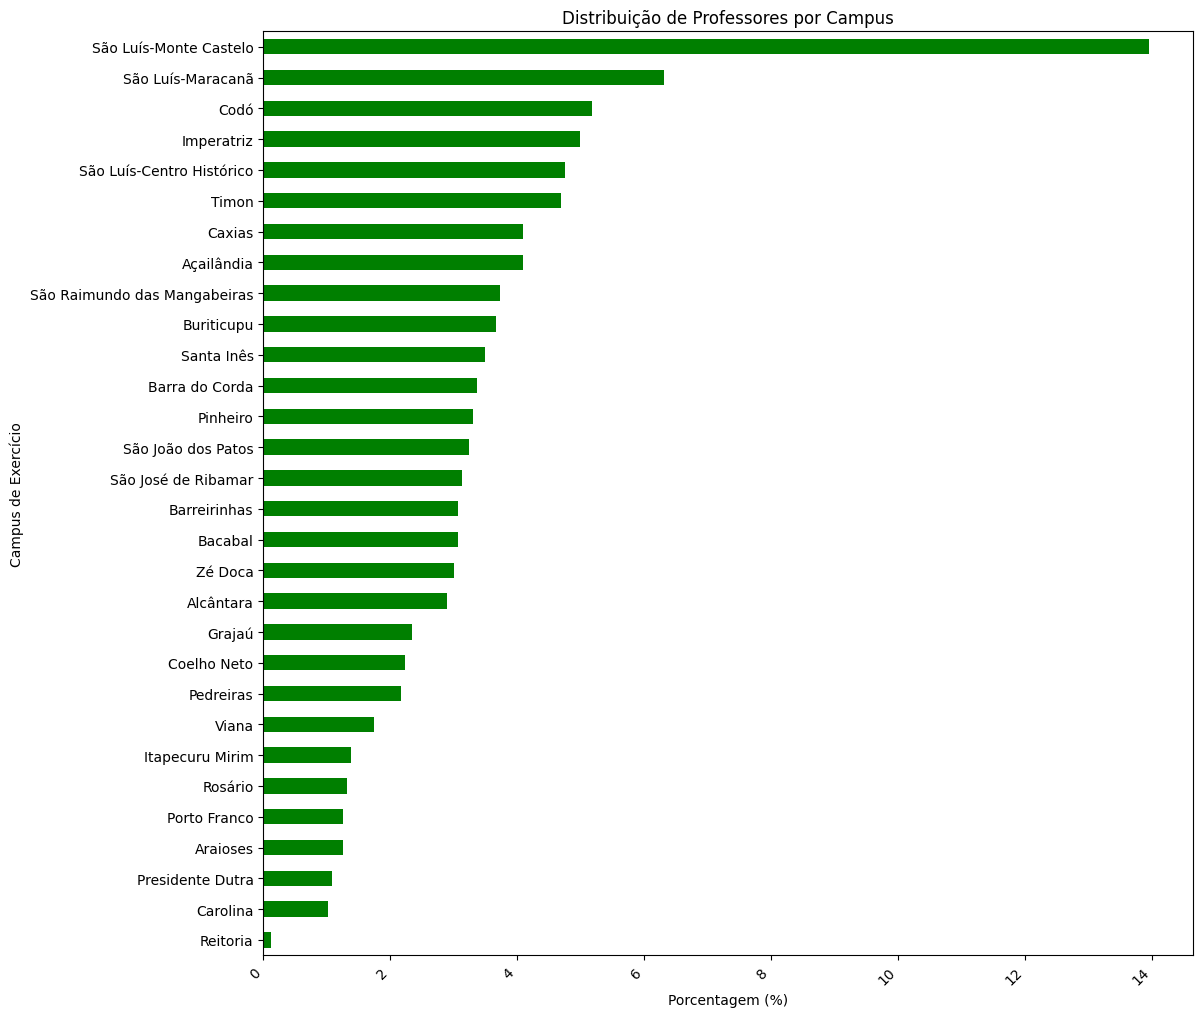

In [ ]:
professores = tabela[tabela['Cargo'] == 'PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) - 707001']
setores_professores = professores['Campus de Lotação']
porcentagens = setores_professores.value_counts(normalize=True) * 100

porcentagens = porcentagens.sort_values(ascending=True)

plt.figure(figsize=(12, 12))
ax = porcentagens.plot(kind='barh', color='#007F00')
plt.title('Professores por Campus')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Campus de Exercício')
plt.xticks(rotation=45, ha='right')
plt.show()

#  **PRODUÇÕES BIBLIOGRÁFICAS** 

Qual é a quantidade de artigos publicados por campus?

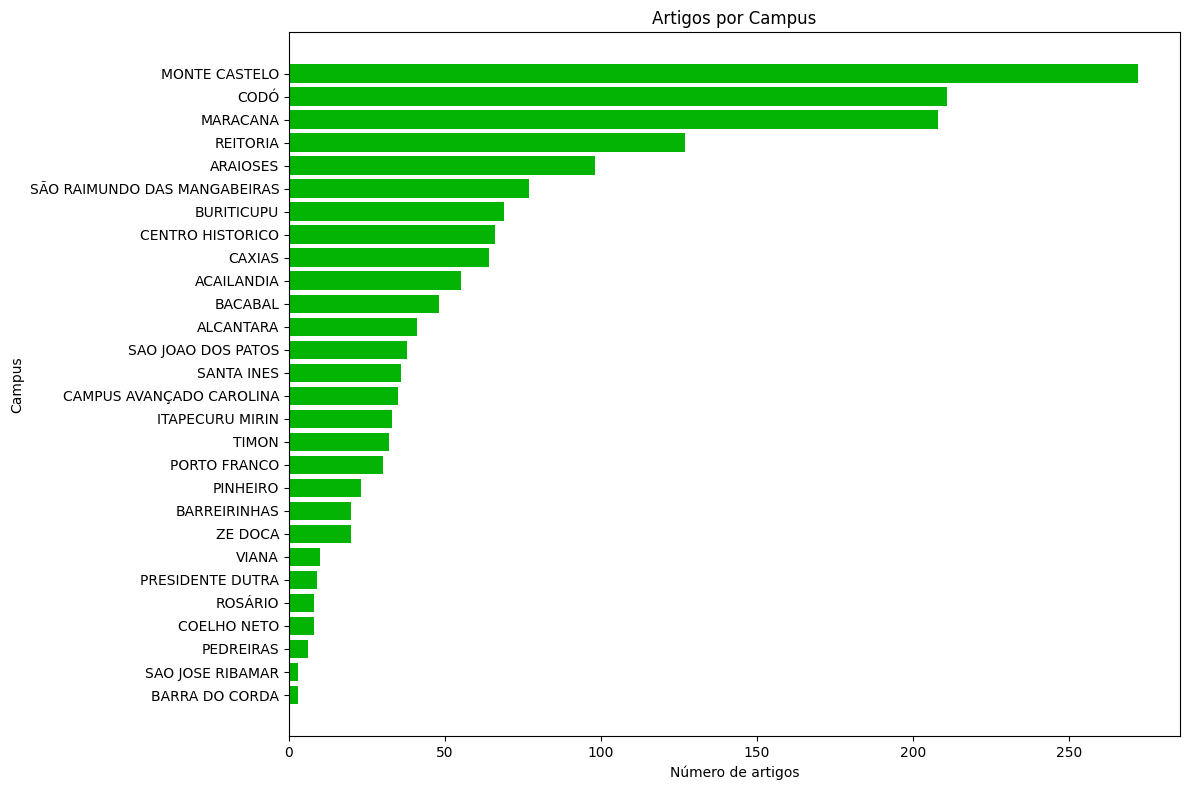

In [17]:
file_path = 'C:/Users/there/Documents/Projeto Mineração de Dados/contagem_artigos.csv'

df = pd.read_csv(file_path)

df_sorted = df.sort_values(by='Numero_de_Linhas', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Arquivo'], df_sorted['Numero_de_Linhas'], color='#04B404')
plt.ylabel('Campus')
plt.xlabel('Número de artigos')
plt.title('Artigos por Campus')
plt.tight_layout()

plt.show()

Qual o número de artigos publicados a partir de 2019 para cada Campus?

         Campus     Ano  Numero_de_Artigos
0    ACAILANDIA  2019.0                  3
1    ACAILANDIA  2020.0                  9
2    ACAILANDIA  2021.0                  3
3    ACAILANDIA  2022.0                  3
4    ACAILANDIA  2023.0                  5
..          ...     ...                ...
128       VIANA  2023.0                  2
129     ZE DOCA  2019.0                  3
130     ZE DOCA  2020.0                  3
131     ZE DOCA  2021.0                  1
132     ZE DOCA  2023.0                  2

[133 rows x 3 columns]


C:\Users\there\AppData\Local\Temp\ipykernel_18356\1291176171.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df_counts['Campus'].unique()))


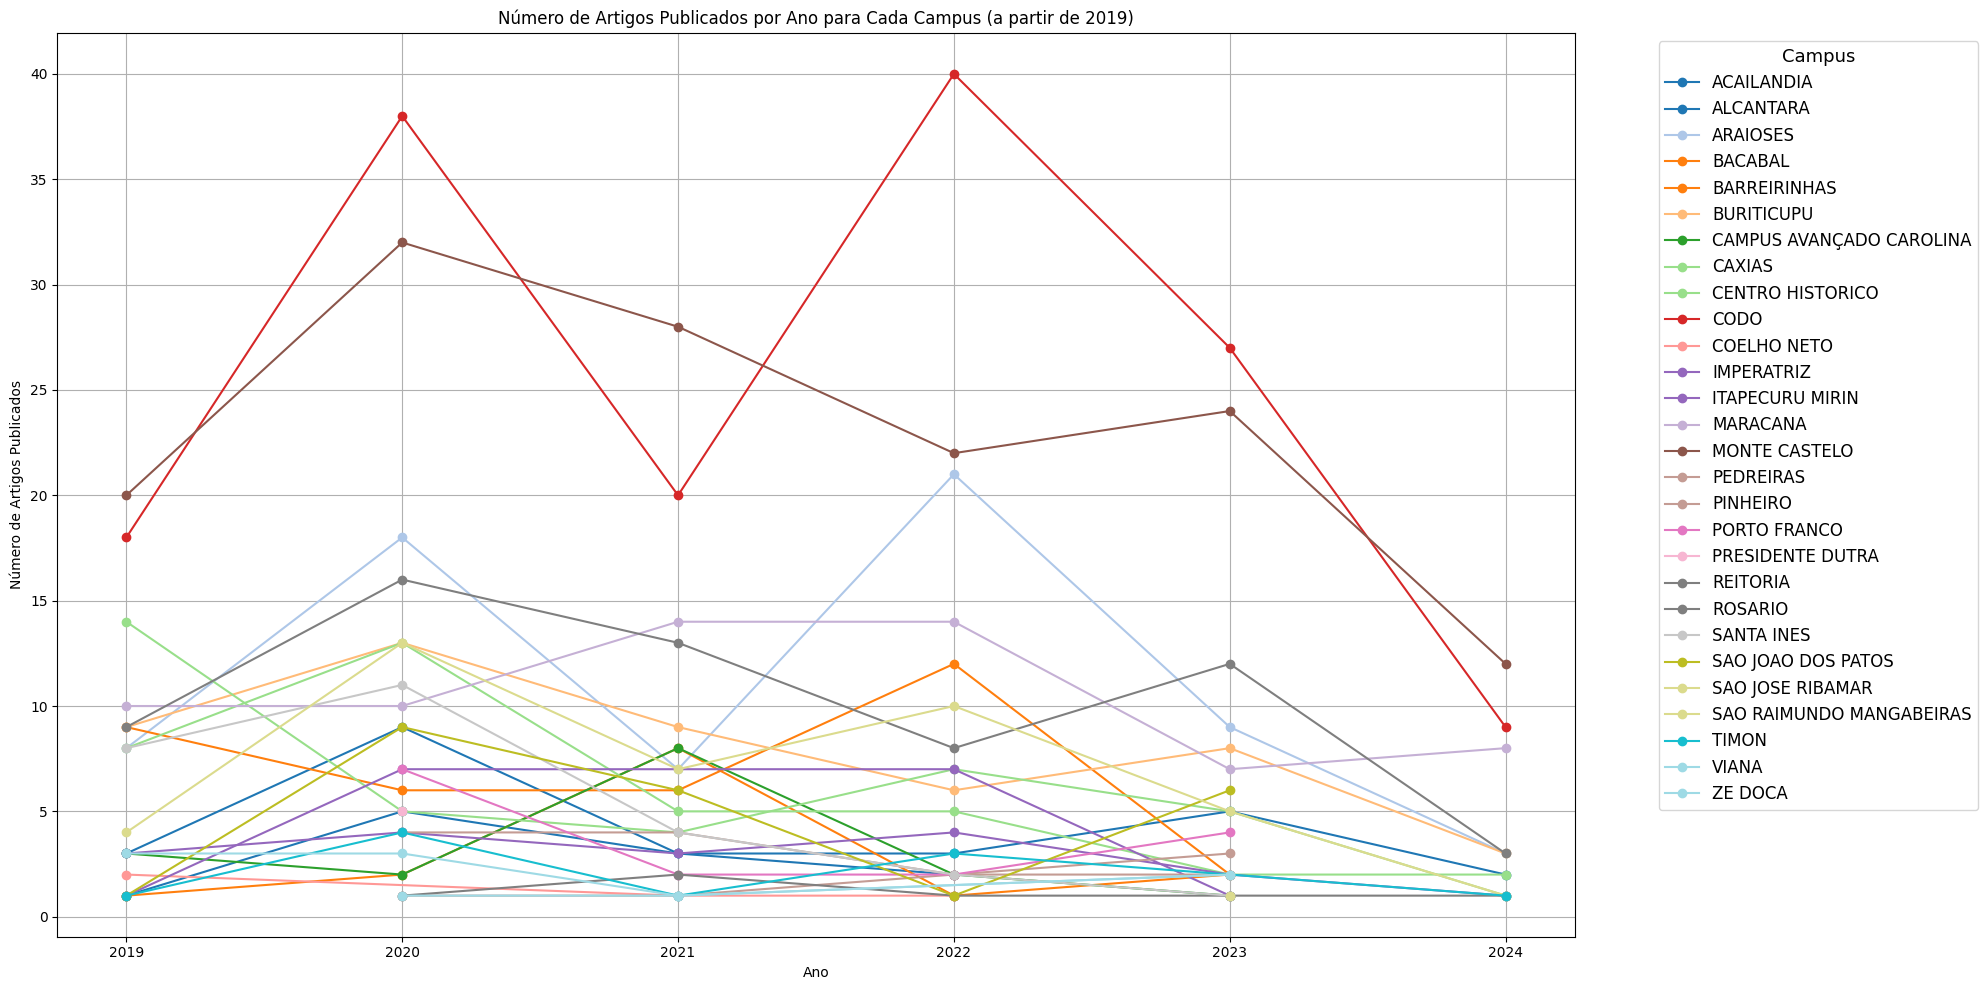

In [15]:
folder_path = 'C:/Users/there/Documents/Projeto Mineração de Dados/Artigos por Campus/'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

dataframes = []

for file in csv_files:
    df = pd.read_csv(file, encoding='latin1')
    
    campus_name = os.path.basename(file).replace('.csv', '')
    df['Campus'] = campus_name
    df = df.iloc[:, [4]] 
    df.columns = ['Ano']
    df['Campus'] = campus_name
    df = df[df['Ano'] >= 2019]
    dataframes.append(df)

df_combined = pd.concat(dataframes, ignore_index=True)

df_counts = df_combined.groupby(['Campus', 'Ano']).size().reset_index(name='Numero_de_Artigos')

print(df_counts)

plt.figure(figsize=(20, 10)) 
colors = plt.cm.get_cmap('tab20', len(df_counts['Campus'].unique()))
for i, campus in enumerate(df_counts['Campus'].unique()):
    df_campus = df_counts[df_counts['Campus'] == campus]
    plt.plot(df_campus['Ano'], df_campus['Numero_de_Artigos'], marker='o', label=campus, color=colors(i))

plt.xlabel('Ano')
plt.ylabel('Número de Artigos Publicados')
plt.title('Número de Artigos Publicados por Ano para Cada Campus (a partir de 2019)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, frameon=True, title='Campus', title_fontsize='13')
plt.grid(True)
plt.tight_layout() 
plt.show()

- Os Campus CODO, BACABAL e MONTE CASTELO, apresentam uma maior produção de artigos em comparação com outros campus;
- CODO teve um pico de produção em 2021, com cerca de 40 artigos, mas a produção caiu significativamente nos anos seguintes;
- O campus de BACABAL demonstrou um aumento consistente até o ano de 2023, seguido por uma leve redução em 2024;
- MONTE CASTELO apresentou uma tendência crescente, alcançando um pico em 2023 antes de uma leve queda em 2024;
- Os campus de BURITICUPU, TURIAÇU, CAXIAS e ACAILANDIA têm uma produção mais baixa de artigos;
- O ano de 2021 parece ser um ano de pico para muitos campus, sugerindo que houve algum fator que aumentou a produção de artigos nesse ano em particular.

Quais os campus mais produtivos nos últimos cinco anos em relação à publicação de artigos?

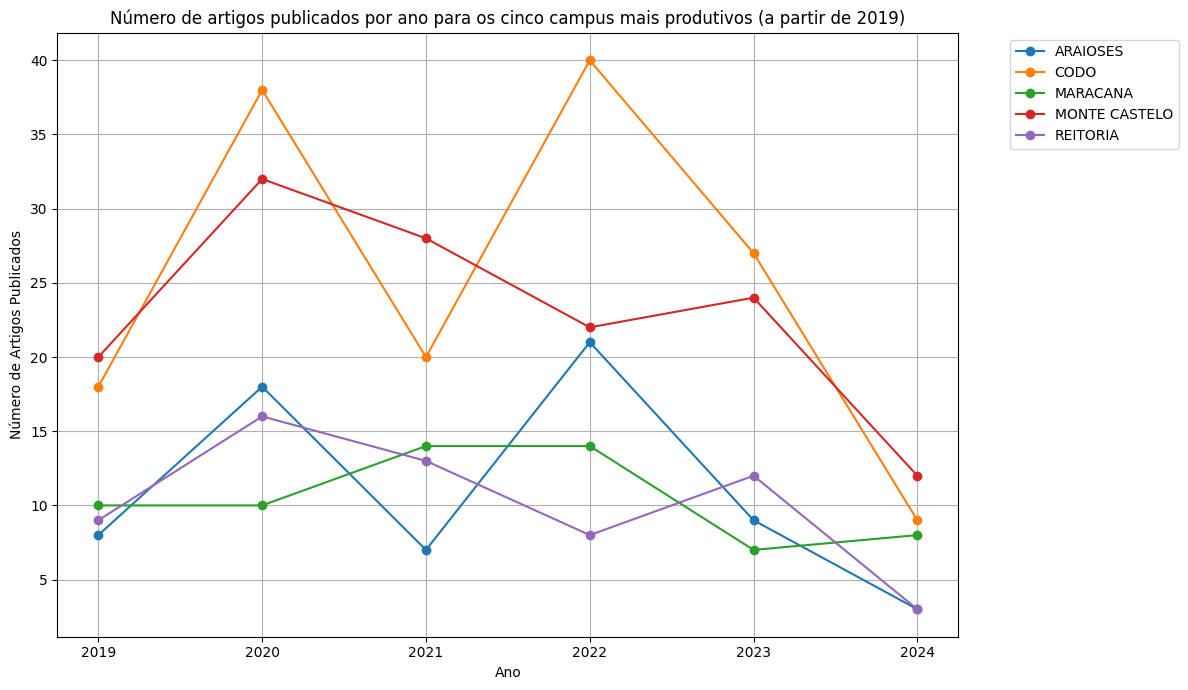

In [10]:
folder_path = 'C:/Users/there/Documents/Projeto Mineração de Dados/Artigos por Campus/'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
dataframes = []

for file in csv_files:
    df = pd.read_csv(file, encoding='latin1')
    campus_name = os.path.basename(file).replace('.csv', '')
    df['Campus'] = campus_name
    df = df.iloc[:, [4]] 
    df.columns = ['Ano']
    df['Campus'] = campus_name
    df = df[df['Ano'] >= 2019]
    dataframes.append(df)

df_combined = pd.concat(dataframes, ignore_index=True)
df_counts = df_combined.groupby(['Campus', 'Ano']).size().reset_index(name='Numero_de_Artigos')

df_top_campi = df_counts.groupby('Campus')['Numero_de_Artigos'].sum().reset_index()
df_top_campi = df_top_campi.sort_values(by='Numero_de_Artigos', ascending=False).head(5)

df_top_counts = df_counts[df_counts['Campus'].isin(df_top_campi['Campus'])]

plt.figure(figsize=(12, 7))
for campus in df_top_counts['Campus'].unique():
    df_campus = df_top_counts[df_top_counts['Campus'] == campus]
    plt.plot(df_campus['Ano'], df_campus['Numero_de_Artigos'], marker='o', label=campus)

plt.xlabel('Ano')
plt.ylabel('Número de Artigos Publicados')
plt.title('Número de artigos publicados por ano para os cinco campus mais produtivos (a partir de 2019)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


- Os anos 2020 e 2022 foram os mais produtivos para a maioria dos Campus, especialmente CODO e ARAIOSES;

- Os campi MARACANA e REITORIA demonstram maior estabilidade em suas publicações ao longo dos anos, enquanto os campi CODO e MONTE CASTELO apresentam variações mais acentuadas.

# **Análise Qualitativa**

**Estudo das produções bibliogáficas do IFMA de acordo com o Qualis.**

Qual a quantidade de artigos em cada faixa de classificação Qualis?

C:\Users\there\AppData\Local\Temp\ipykernel_15392\1986848368.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)


Qualis
A1    107
A2    114
A3    127
A4     70
B1     95
B2     57
B3     90
B4    137
C      32
Name: count, dtype: int64


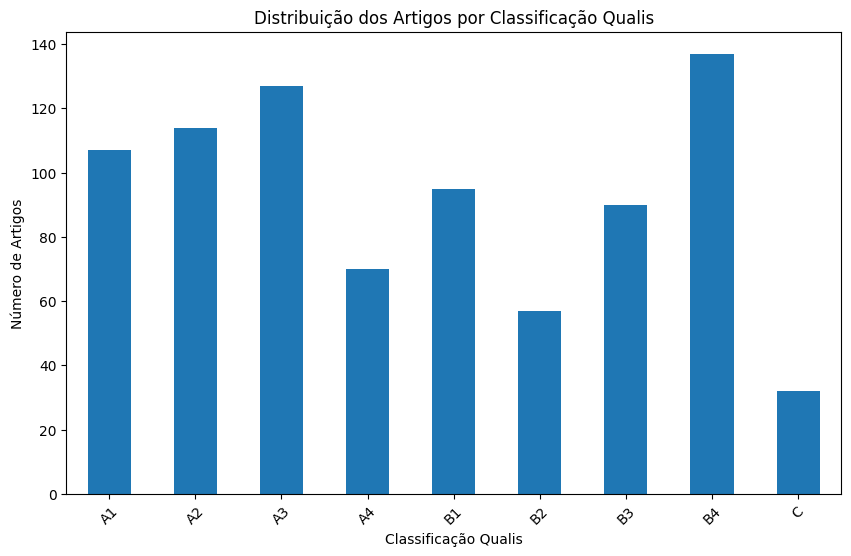

In [23]:
input_folder = 'C:/Users/there/Documents/Projeto Mineração de Dados/QualisCSV'
dataframes = []

for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
qualis_distribution = combined_df['Qualis'].value_counts().sort_index()
print(qualis_distribution)

plt.figure(figsize=(10, 6))
qualis_distribution.plot(kind='bar')
plt.title('Distribuição dos Artigos por Classificação Qualis')
plt.xlabel('Classificação Qualis')
plt.ylabel('Número de Artigos')
plt.xticks(rotation=45)
plt.show()

Qual a classificação de qualis por campus?

C:\Users\there\AppData\Local\Temp\ipykernel_18356\592893230.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)


Número total de publicações por campus:
campus
CODÓ                   143
MONTE CASTELO          126
ARAIOSES                63
REITORIA                58
MARACANA                55
BURITICUPU              45
MANGABEIRAS             39
BACABAL                 35
CENTRO HISTORICO        35
CAXIAS                  33
SANTA INES              26
SÃO JOÃO DOS PATOS      23
ACAILANDIA              23
ITAPECURU MIRIN         16
CAROLINA                16
PORTO FRANCO            15
BARREIRINHAS            14
PINHEIRO                13
TIMON                    9
ZÉ DOCA                  9
ALCANTARA                8
PEDREIRAS                6
PRESIDENTE DUTRA         5
ROSÁRIO                  5
COELHO NETO              4
VIANA                    4
SÃO JOSE DE RIBAMAR      1
Name: count, dtype: int64
Classificação Qualis por campus:
Qualis                 A1    A2    A3    A4    B1    B2    B3    B4    C
campus                                                                  
CODÓ               

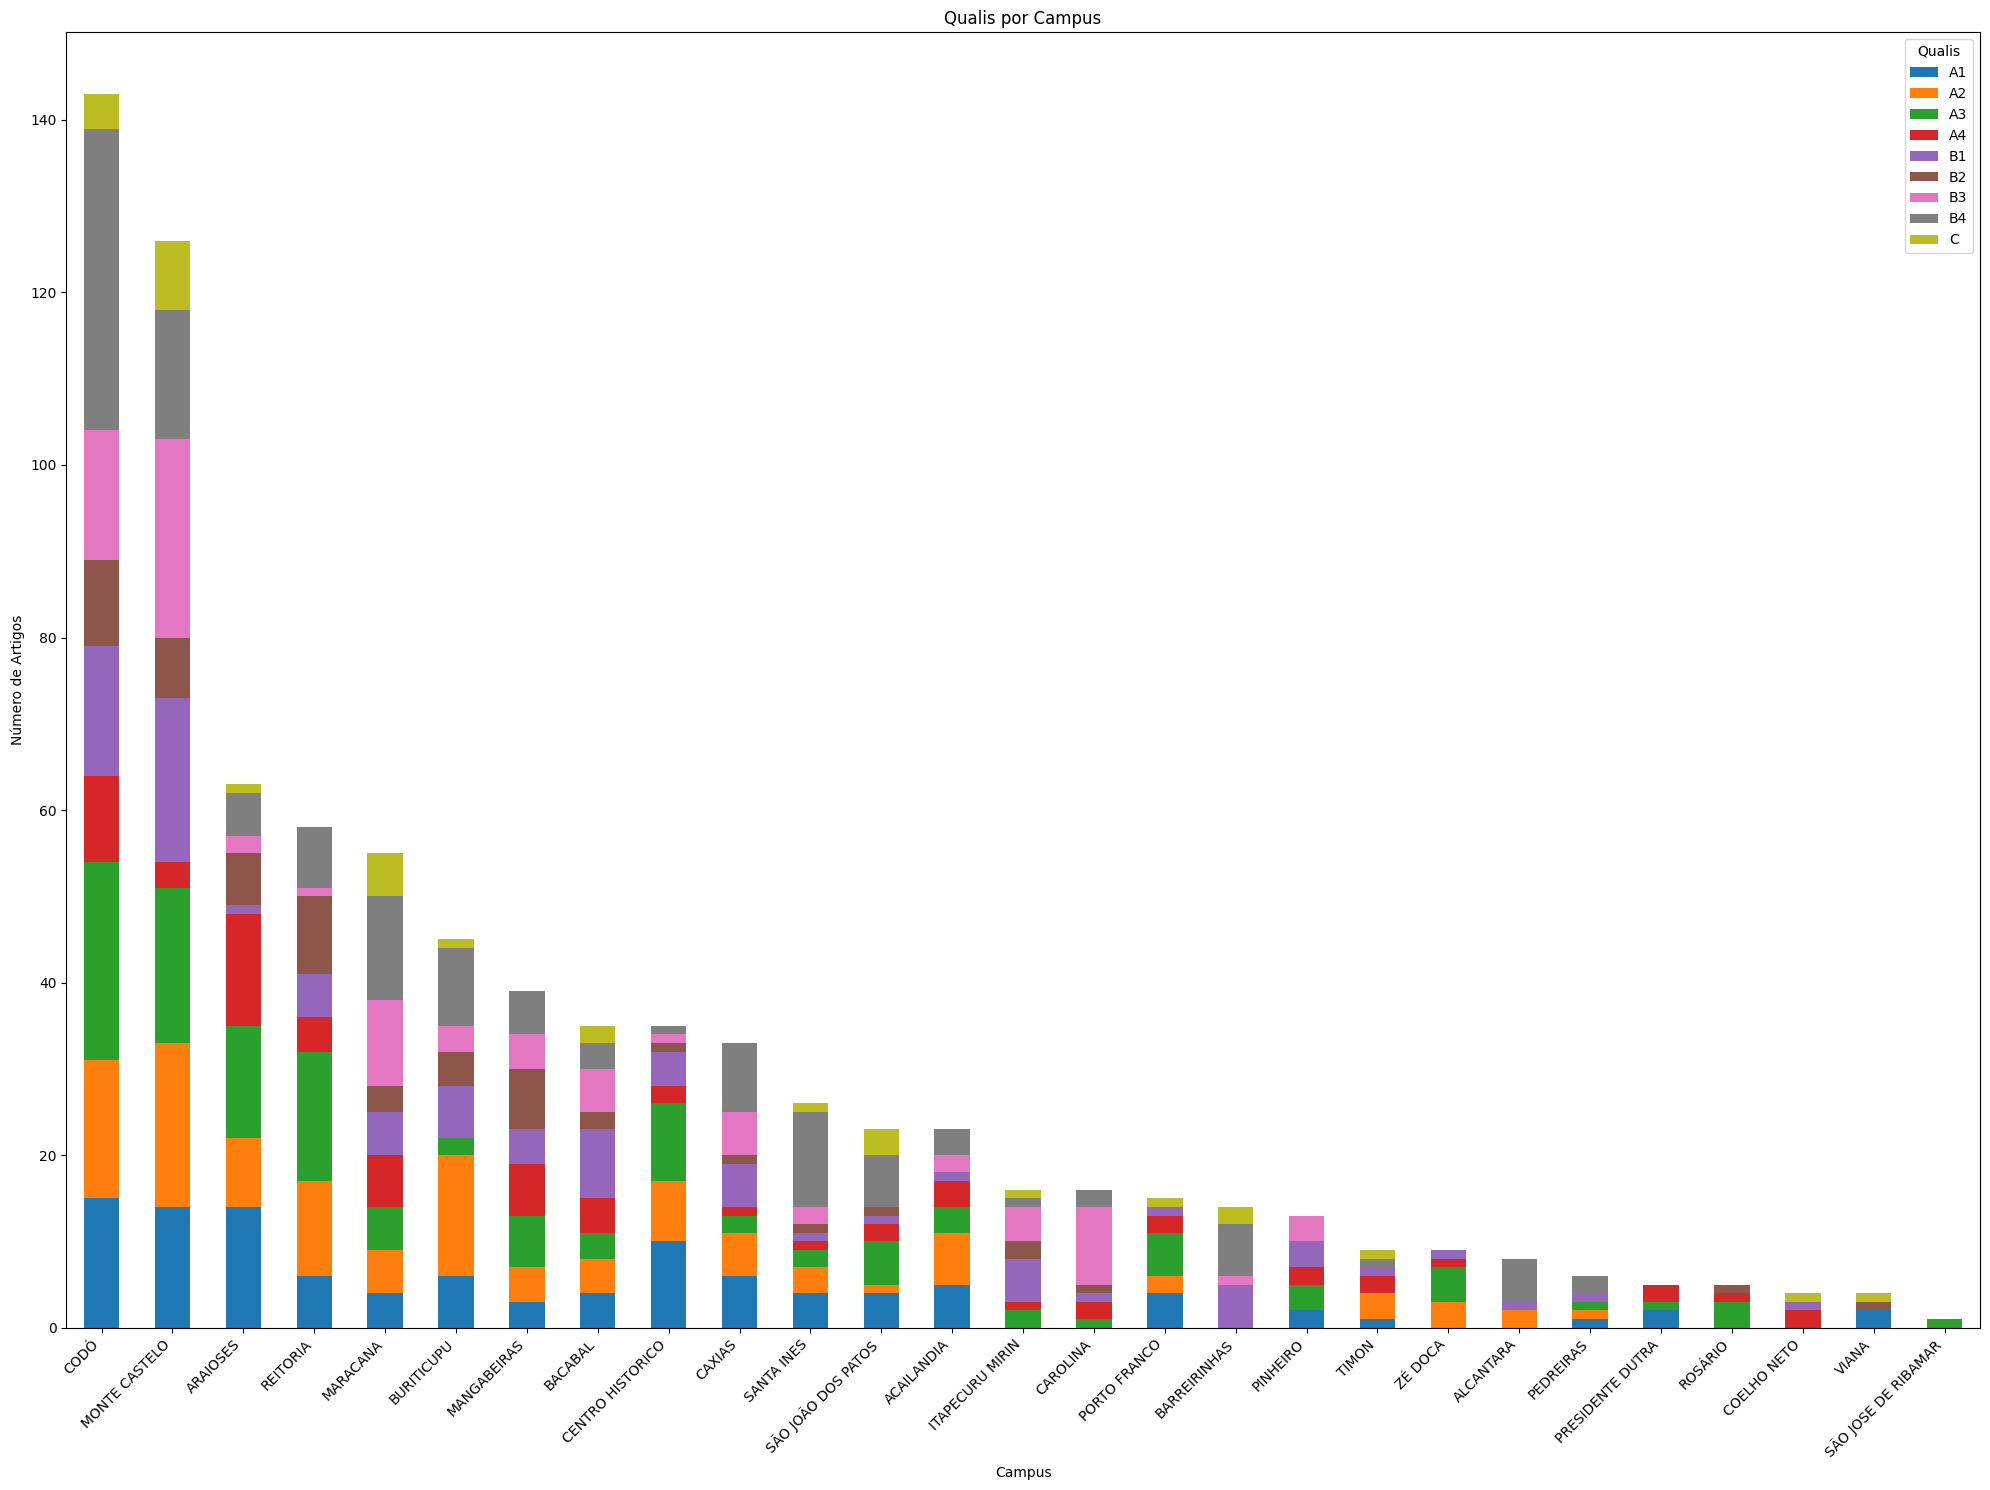

In [23]:
input_folder = 'C:/Users/there/Documents/Projeto Mineração de Dados/QualisCSV'
dataframes = []

for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)
        df['campus'] = filename.split('_')[-1].split('.')[0]
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
publications_per_campus = combined_df['campus'].value_counts()
qualis_distribution_per_campus = combined_df.groupby('campus')['Qualis'].value_counts().unstack().fillna(0)
qualis_distribution_per_campus = qualis_distribution_per_campus.loc[publications_per_campus.index]

print("Número total de publicações por campus:")
print(publications_per_campus)
print("Classificação Qualis por campus:")
print(qualis_distribution_per_campus)

ax = qualis_distribution_per_campus.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.title('Qualis por Campus')
plt.xlabel('Campus')
plt.ylabel('Número de Artigos')
plt.legend(title='Qualis')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


Qual a classificação Qualis dos 5 campi mais produtivos?

C:\Users\there\AppData\Local\Temp\ipykernel_18356\25797857.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)


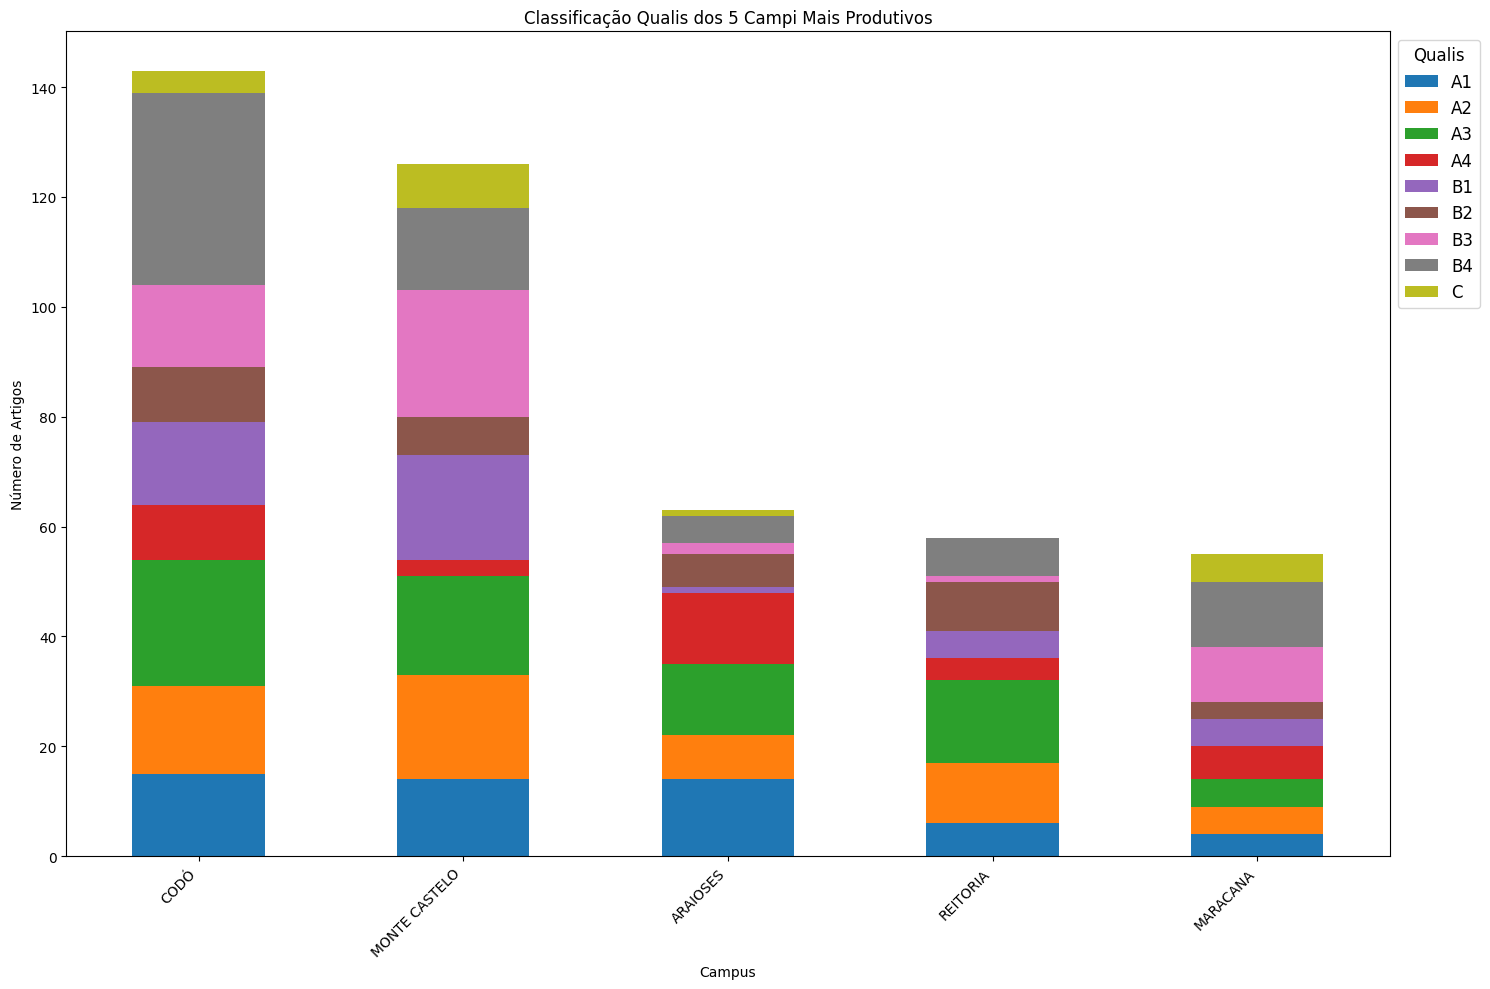

In [24]:
def qualis_score(qualis):
    scores = {
        'A1': 9, 'A2': 8, 'A3': 7, 'A4': 6,
        'B1': 5, 'B2': 4, 'B3': 3, 'B4': 2,
        'C': 1
    }
    return scores.get(qualis, 0)

input_folder = 'C:/Users/there/Documents/Projeto Mineração de Dados/QualisCSV'
dataframes = []

for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)
        df['campus'] = filename.split('_')[-1].split('.')[0]  
        df['Qualis Score'] = df['Qualis'].map(qualis_score)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
publications_per_campus = combined_df['campus'].value_counts()
qualis_distribution_per_campus = combined_df.groupby('campus')['Qualis'].value_counts().unstack().fillna(0)
impact_per_campus = combined_df.groupby('campus')['Qualis Score'].sum()
top_5_campi = publications_per_campus.head(5).index
top_5_qualis_distribution = qualis_distribution_per_campus.loc[top_5_campi]

ax = top_5_qualis_distribution.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Classificação Qualis dos 5 Campi Mais Produtivos')
plt.xlabel('Campus')
plt.ylabel('Número de Artigos')

plt.legend(title='Qualis', fontsize='large', title_fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()